In [4]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
from sklearn.model_selection import train_test_split
# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data = pd.read_csv("/content/drive/MyDrive/IA/company_esg_financial_dataset.csv")

print(data.select_dtypes(include=['object']).head())

  CompanyName Industry         Region
0   Company_1   Retail  Latin America
1   Company_1   Retail  Latin America
2   Company_1   Retail  Latin America
3   Company_1   Retail  Latin America
4   Company_1   Retail  Latin America


In [7]:
data = data.dropna()
data_num = pd.get_dummies(data, drop_first=True)


In [8]:
print(data)

       CompanyID   CompanyName        Industry         Region  Year  Revenue  \
1              1     Company_1          Retail  Latin America  2016    473.8   
2              1     Company_1          Retail  Latin America  2017    564.9   
3              1     Company_1          Retail  Latin America  2018    558.4   
4              1     Company_1          Retail  Latin America  2019    554.5   
5              1     Company_1          Retail  Latin America  2020    567.5   
...          ...           ...             ...            ...   ...      ...   
10995       1000  Company_1000  Consumer Goods  Latin America  2021   3419.2   
10996       1000  Company_1000  Consumer Goods  Latin America  2022   3518.8   
10997       1000  Company_1000  Consumer Goods  Latin America  2023   3417.1   
10998       1000  Company_1000  Consumer Goods  Latin America  2024   3183.2   
10999       1000  Company_1000  Consumer Goods  Latin America  2025   3173.5   

       ProfitMargin  MarketCap  GrowthR

In [9]:
print("Filas originales:", data.shape[0])
print("Filas después de dropna:", data_num.shape[0])

Filas originales: 10000
Filas después de dropna: 10000


In [10]:
print(data_num)

       CompanyID  Year  Revenue  ProfitMargin  MarketCap  GrowthRate  \
1              1  2016    473.8           4.6      366.6         3.2   
2              1  2017    564.9           5.2      313.4        19.2   
3              1  2018    558.4           4.3      283.0        -1.1   
4              1  2019    554.5           4.9      538.1        -0.7   
5              1  2020    567.5           6.0      384.1         2.3   
...          ...   ...      ...           ...        ...         ...   
10995       1000  2021   3419.2          21.7    14416.7         0.4   
10996       1000  2022   3518.8          21.4     8078.9         2.9   
10997       1000  2023   3417.1          17.1    13263.4        -2.9   
10998       1000  2024   3183.2          15.7     6960.1        -6.8   
10999       1000  2025   3173.5          17.5     5666.1        -0.3   

       ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance  ...  \
1             56.7               58.9        32.8            

In [11]:
# Convierte todos los valores booleanos a 0 y 1
data_num = data_num.astype(int)

print(data_num.dtypes.tail())   # revisa que ahora sean int
print(data_num.head())

Region_Europe           int64
Region_Latin America    int64
Region_Middle East      int64
Region_North America    int64
Region_Oceania          int64
dtype: object
   CompanyID  Year  Revenue  ProfitMargin  MarketCap  GrowthRate  ESG_Overall  \
1          1  2016      473             4        366           3           56   
2          1  2017      564             5        313          19           56   
3          1  2018      558             4        283          -1           58   
4          1  2019      554             4        538           0           56   
5          1  2020      567             6        384           2           55   

   ESG_Environmental  ESG_Social  ESG_Governance  ...  Industry_Retail  \
1                 58          32              78  ...                1   
2                 57          34              77  ...                1   
3                 62          33              78  ...                1   
4                 63          30              76  ...

In [12]:
# Define features and target
X = data_num.drop(["EnergyConsumption", "CompanyID"], axis=1).values  # Exclude CompanyID and target
y = data_num["EnergyConsumption"].values
m = y.size

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
m_train = y_train.size  # Number of training examples
m_test = y_test.size   # Number of test examples
print("Training set dimensions:", X_train.shape)
print("Test set dimensions:", X_test.shape)
print("Target train shape:", y_train.shape)
print("Target test shape:", y_test.shape)

Training set dimensions: (8000, 1024)
Test set dimensions: (2000, 1024)
Target train shape: (8000,)
Target test shape: (2000,)


In [15]:
# Add polynomial features (degree 2)
def add_polynomial_features(X, degree=2):
    X_poly = X.copy()
    for i in range(X.shape[1]):
        X_poly = np.concatenate([X_poly, X[:, i:i+1] ** 2], axis=1)
    return X_poly

# Apply polynomial features to both train and test sets
X_train_poly = add_polynomial_features(X_train)
X_test_poly = add_polynomial_features(X_test)
print("Training shape with polynomial features:", X_train_poly.shape)
print("Test shape with polynomial features:", X_test_poly.shape)

Training shape with polynomial features: (8000, 2048)
Test shape with polynomial features: (2000, 2048)


In [16]:
# Feature normalization
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    # Avoid division by zero
    sigma[sigma == 0] = 1
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalize features (use training set statistics for both train and test)
X_train_norm, mu, sigma = featureNormalize(X_train_poly)
X_test_norm = (X_test_poly - mu) / sigma  # Normalize test set with train statistics
print("Normalized training features sample:\n", X_train_norm[:5])

Normalized training features sample:
 [[-1.82836673e-01 -4.34548097e-01 -1.76277765e-01 ... -4.13887756e-01
  -4.07861226e-01 -4.20701615e-01]
 [-1.22886293e+00  1.36187522e-04  7.31420114e-01 ... -4.13887756e-01
  -4.07861226e-01 -4.20701615e-01]
 [-1.57753835e+00 -2.60466355e-01  1.52565576e+00 ... -4.13887756e-01
   2.45181433e+00 -4.20701615e-01]
 [ 8.63189585e-01  1.33652439e-01  2.77571175e-01 ... -4.13887756e-01
  -4.07861226e-01 -4.20701615e-01]
 [ 1.56054042e+00 -3.03112126e-01 -1.08397564e+00 ... -4.13887756e-01
   2.45181433e+00 -4.20701615e-01]]


In [17]:
# Add intercept term
X_train_norm = np.concatenate([np.ones((m_train, 1)), X_train_norm], axis=1)
X_test_norm = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
print("Training shape with intercept term:", X_train_norm.shape)
print("Test shape with intercept term:", X_test_norm.shape)

Training shape with intercept term: (8000, 2049)
Test shape with intercept term: (2000, 2049)


In [18]:
# Cost function for multiple features
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y))
    return J

In [19]:
# Gradient descent for multiple features
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = np.dot(X, theta)
        theta = theta - (alpha / m) * np.dot((h - y), X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [21]:
# Train the model
alpha = 0.001  # Learning rate
num_iters = 10000  # Number of iterations
thetaPol = np.zeros(X_train_norm.shape[1])  # Initialize theta
thetaPol, J_history = gradientDescentMulti(X_train_norm, y_train, thetaPol, alpha, num_iters)

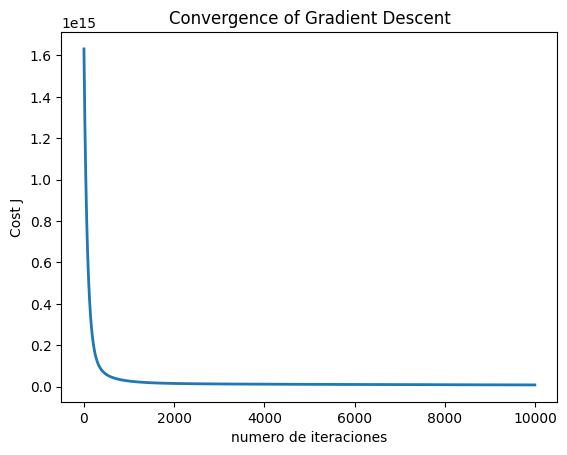

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('numero de iteraciones')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()
